In [1]:
#Loading and Exploring Data


import pandas as pd

# Load the datasets
train_data_path = 'drugLibTrain_raw.tsv'
test_data_path = 'drugLibTest_raw.tsv'

# Reading the data
train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')

# Displaying the first few rows of the training data to understand its structure
train_data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [2]:
#Preprocessing the Data


import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources only once
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert non-string data to string
    if not isinstance(text, str):
        text = str(text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in english_stopwords]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply preprocessing to each text column
columns_to_process = ['benefitsReview', 'sideEffectsReview', 'commentsReview']
for column in columns_to_process:
    train_data[column] = train_data[column].str.lower().apply(preprocess_text)
    test_data[column] = test_data[column].str.lower().apply(preprocess_text)

train_data.head()


[nltk_data] Downloading package stopwords to /home/ayusee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayusee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed progression left ventricular dysfunctio...,cough hypotension proteinuria impotence renal ...,monitor blood pressure weight ass resolution f...
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although type birth control con pro help cramp...,heavy cycle cramp hot flash fatigue long lasti...,hate birth control would suggest anyone
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,used cramp badly would leave balled bed least ...,heavier bleeding clotting normal,took pill onset menstrual cramp every hour too...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,acid reflux went away month day drug heartburn...,constipation dry mouth mild dizziness would go...,given prilosec prescription dose mg per day me...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,think lyrica starting help pain side effect se...,felt extremely drugged dopey could drive med a...,see


In [ ]:
#Text Data Analysis and Feature Extraction
#Combined Approach: Useful when the context of the text across different columns is related and can be considered as a whole.
    

# 1. Import Necessary Libraries for Analysis
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming train_data and test_data are already loaded and preprocessed

# 2. Concatenate Text Columns (If needed)
# Combining 'benefitsReview', 'sideEffectsReview', 'commentsReview' into a single column
train_data['combined_text'] = train_data[['benefitsReview', 'sideEffectsReview', 'commentsReview']].agg(' '.join, axis=1)
test_data['combined_text'] = test_data[['benefitsReview', 'sideEffectsReview', 'commentsReview']].agg(' '.join, axis=1)

# 3. Exploratory Analysis: Word Frequency
all_text = ' '.join(train_data['combined_text'])
word_counts = Counter(all_text.split())
most_common_words = word_counts.most_common(30)
print("Most Common Words:", most_common_words)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words')
plt.show()

# 4. Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can tune these parameters
train_tfidf = tfidf_vectorizer.fit_transform(train_data['combined_text'])
test_tfidf = tfidf_vectorizer.transform(test_data['combined_text'])

# Now, train_tfidf and test_tfidf are ready for use in machine learning models.


Most Common Words: [('day', 2962), ('effect', 2350), ('side', 2000), ('take', 1808), ('taking', 1703), ('mg', 1634), ('time', 1601), ('drug', 1542), ('pain', 1426), ('medication', 1337), ('week', 1317), ('year', 1148), ('one', 1127), ('would', 1124), ('also', 1106), ('month', 1084), ('treatment', 1077), ('skin', 933), ('took', 919), ('first', 893), ('pill', 859), ('get', 820), ('night', 793), ('sleep', 781), ('feel', 774), ('doctor', 768), ('started', 754), ('like', 733), ('hour', 711), ('felt', 680)]


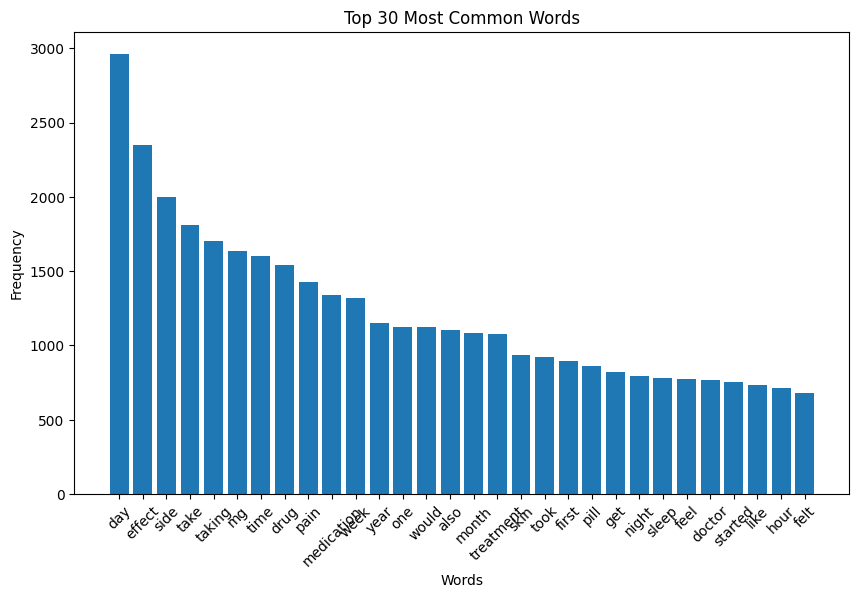

In [9]:
#Text Data Analysis and Feature Extraction
#Separate Approach: Better when each text column has distinct contextual information that you want to capture individually.


# Import Necessary Libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack, csr_matrix


# Assuming train_data and test_data are already loaded and preprocessed

# Exploratory Analysis: Word Frequency
# Combining text for exploratory analysis
all_text = ' '.join(train_data[['benefitsReview', 'sideEffectsReview', 'commentsReview']].agg(' '.join, axis=1))
word_counts = Counter(all_text.split())
most_common_words = word_counts.most_common(30)
print("Most Common Words:", most_common_words)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 30 Most Common Words')
plt.show()

# One-Hot Encoding for Categorical Columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features_train = encoder.fit_transform(train_data[['effectiveness', 'sideEffects', 'condition']])
encoded_features_test = encoder.transform(test_data[['effectiveness', 'sideEffects', 'condition']])

# Separate TF-IDF Vectorization for Text Columns
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Applying TF-IDF Vectorization
benefits_tfidf_train = tfidf_vectorizer.fit_transform(train_data['benefitsReview'])
benefits_tfidf_test = tfidf_vectorizer.transform(test_data['benefitsReview'])

sideEffects_tfidf_train = tfidf_vectorizer.fit_transform(train_data['sideEffectsReview'])
sideEffects_tfidf_test = tfidf_vectorizer.transform(test_data['sideEffectsReview'])

comments_tfidf_train = tfidf_vectorizer.fit_transform(train_data['commentsReview'])
comments_tfidf_test = tfidf_vectorizer.transform(test_data['commentsReview'])

# Combining All Features
train_features = hstack([csr_matrix(benefits_svd_train), csr_matrix(sideEffects_svd_train), csr_matrix(comments_svd_train), encoded_features_train])
test_features = hstack([csr_matrix(benefits_svd_test), csr_matrix(sideEffects_svd_test), csr_matrix(comments_svd_test), encoded_features_test])

# Now, train_features and test_features are ready for use in machine learning models.


In [19]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the target variable
target = train_data['rating']  # Replace 'rating' with your actual target variable

# Convert target to numerical values (assuming it's categorical)
target_mapping = {value: index for index, value in enumerate(target.unique())}
target = target.map(target_mapping)

# Create a LightGBM dataset
train_dataset = lgb.Dataset(train_features.astype(np.float32), label=target)

# Define LightGBM parameters (you can adjust these)
params = {
    'objective': 'multiclass',  # Change to 'binary' for binary classification
    'num_class': len(target.unique()),  # Number of classes
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',  # Change metric for different evaluation criteria
    'num_leaves': 31,  # Adjust as needed
    'learning_rate': 0.05,  # Adjust as needed
    'feature_fraction': 0.9,  # Adjust as needed
    'bagging_fraction': 0.8,  # Adjust as needed
    'bagging_freq': 5,  # Adjust as needed
    'verbose': -1,
    'random_seed': 42
}

# Train the LightGBM model
num_boost_round = 1000  # You can adjust the number of boosting rounds
model = lgb.train(params, train_dataset, num_boost_round=num_boost_round)

# Predicting on the test set
predicted_lgb = model.predict(test_features.astype(np.float32), num_iteration=model.best_iteration)

# Convert predicted probabilities to class labels
predicted_lgb_labels = np.argmax(predicted_lgb, axis=1)

# Reverse mapping to get original labels
predicted_lgb_labels = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in predicted_lgb_labels]

# Evaluating the LightGBM classifier
print("LightGBM Classifier Evaluation:")
print(classification_report(test_data['rating'], predicted_lgb_labels))  # Replace 'rating' with your actual target variable
print("Accuracy:", accuracy_score(test_data['rating'], predicted_lgb_labels))


LightGBM Classifier Evaluation:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69       115
           2       0.00      0.00      0.00        33
           3       0.24      0.24      0.24        49
           4       0.24      0.09      0.13        44
           5       0.40      0.06      0.10        67
           6       0.25      0.10      0.15        58
           7       0.29      0.27      0.28       121
           8       0.40      0.51      0.45       190
           9       0.25      0.19      0.22       133
          10       0.61      0.85      0.71       226

    accuracy                           0.46      1036
   macro avg       0.33      0.32      0.30      1036
weighted avg       0.40      0.46      0.41      1036

Accuracy: 0.4555984555984556


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Define your target variable
target = train_data['rating']  # Replace 'rating' with your actual target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels
train_labels = label_encoder.fit_transform(target)

# Define your MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define your hyperparameters
input_dim = train_features.shape[1]  # Adjust based on your feature dimension
hidden_dim = 128  # Adjust as needed
output_dim = len(label_encoder.classes_)  # Number of classes

# Initialize and preprocess your data (train_features, test_features, train_labels, test_labels)
# Ensure that train_features and test_features are in the same format as in the LightGBM model

# Define your DataLoader for batching
batch_size = 64  # Adjust as needed
train_dataset = TensorDataset(torch.tensor(train_features.toarray()), torch.tensor(train_labels))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize your MLP model
model = MLP(input_dim, hidden_dim, output_dim)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(data.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Testing
model.eval()
predicted_labels = []
with torch.no_grad():
    for data in test_features:
        outputs = model(torch.tensor(data.toarray()).float())
        predicted_label = torch.argmax(outputs).item()
        predicted_labels.append(predicted_label)

# Reverse mapping to get original labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Evaluating the MLP classifier
print("MLP Classifier Evaluation:")
print(classification_report(test_data['rating'], predicted_labels))  # Replace 'rating' with your actual target variable
print("Accuracy:", accuracy_score(test_data['rating'], predicted_labels))


Epoch 1/10: 100%|███████████████████████████████| 49/49 [00:01<00:00, 29.71it/s]


Epoch 1/10, Loss: 105.1917


Epoch 2/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 360.84it/s]


Epoch 2/10, Loss: 82.0902


Epoch 3/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 363.24it/s]


Epoch 3/10, Loss: 69.1277


Epoch 4/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 379.90it/s]


Epoch 4/10, Loss: 61.9029


Epoch 5/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 395.97it/s]


Epoch 5/10, Loss: 56.9559


Epoch 6/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 379.96it/s]


Epoch 6/10, Loss: 52.3899


Epoch 7/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 372.14it/s]


Epoch 7/10, Loss: 48.0903


Epoch 8/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 382.71it/s]


Epoch 8/10, Loss: 44.1857


Epoch 9/10: 100%|██████████████████████████████| 49/49 [00:00<00:00, 431.31it/s]


Epoch 9/10, Loss: 40.5384


Epoch 10/10: 100%|█████████████████████████████| 49/49 [00:00<00:00, 336.07it/s]


Epoch 10/10, Loss: 37.0232
MLP Classifier Evaluation:
              precision    recall  f1-score   support

           1       0.60      0.83      0.69       115
           2       0.00      0.00      0.00        33
           3       0.27      0.33      0.29        49
           4       0.36      0.11      0.17        44
           5       0.22      0.16      0.19        67
           6       0.15      0.05      0.08        58
           7       0.31      0.39      0.34       121
           8       0.39      0.42      0.41       190
           9       0.28      0.26      0.27       133
          10       0.65      0.73      0.69       226

    accuracy                           0.44      1036
   macro avg       0.32      0.33      0.31      1036
weighted avg       0.40      0.44      0.42      1036

Accuracy: 0.4420849420849421


/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from scipy.sparse import csr_matrix

# Convert sparse matrices to dense tensors
train_features_dense = torch.tensor(train_features.toarray(), dtype=torch.long)
test_features_dense = torch.tensor(test_features.toarray(), dtype=torch.long)

# Define your LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(input_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.embedding(x.long())  # Convert input to Long data type
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Get the last time step's output
        x = self.fc(out)
        return x

# Define your hyperparameters
embedding_dim = 100  # Adjust as needed
hidden_size = 128  # Adjust as needed
num_classes = len(target.unique())  # Number of classes

# Initialize your LSTM model
model = LSTMClassifier(vocab_size, hidden_size, num_classes)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate as needed

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for data, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Testing
model.eval()
predicted_labels = []
with torch.no_grad():
    for data in test_features_dense:
        data = torch.tensor(data, dtype=torch.long).unsqueeze(0)  # Add batch dimension
        outputs = model(data)
        predicted_label = torch.argmax(outputs).item()
        predicted_labels.append(predicted_label)

# Reverse mapping to get original labels
predicted_labels = [list(target_mapping.keys())[list(target_mapping.values()).index(label)] for label in predicted_labels]

# Evaluating the LSTM classifier
print("LSTM Classifier Evaluation:")
print(classification_report(test_data['rating'], predicted_labels))  # Replace 'rating' with your actual target variable
print("Accuracy:", accuracy_score(test_data['rating'], predicted_labels))


Epoch 1/10: 100%|███████████████████████████████| 49/49 [04:24<00:00,  5.40s/it]


Epoch 1/10, Loss: 103.4135


Epoch 2/10: 100%|███████████████████████████████| 49/49 [03:49<00:00,  4.68s/it]


Epoch 2/10, Loss: 102.6928


Epoch 3/10: 100%|███████████████████████████████| 49/49 [03:50<00:00,  4.70s/it]


Epoch 3/10, Loss: 102.5974


Epoch 4/10: 100%|███████████████████████████████| 49/49 [04:18<00:00,  5.27s/it]


Epoch 4/10, Loss: 102.4647


Epoch 5/10: 100%|███████████████████████████████| 49/49 [03:54<00:00,  4.79s/it]


Epoch 5/10, Loss: 102.5469


Epoch 6/10: 100%|███████████████████████████████| 49/49 [04:52<00:00,  5.97s/it]


Epoch 6/10, Loss: 102.4523


Epoch 7/10: 100%|███████████████████████████████| 49/49 [05:19<00:00,  6.51s/it]


Epoch 7/10, Loss: 102.5955


Epoch 8/10: 100%|███████████████████████████████| 49/49 [05:19<00:00,  6.51s/it]


Epoch 8/10, Loss: 102.5904


Epoch 9/10: 100%|███████████████████████████████| 49/49 [05:20<00:00,  6.53s/it]


Epoch 9/10, Loss: 102.5553


Epoch 10/10: 100%|██████████████████████████████| 49/49 [05:19<00:00,  6.51s/it]
/tmp/ipykernel_10537/1167337017.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.long).unsqueeze(0)  # Add batch dimension


Epoch 10/10, Loss: 102.4518
LSTM Classifier Evaluation:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       115
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        44
           5       0.06      1.00      0.12        67
           6       0.00      0.00      0.00        58
           7       0.00      0.00      0.00       121
           8       1.00      0.01      0.01       190
           9       0.00      0.00      0.00       133
          10       0.00      0.00      0.00       226

    accuracy                           0.07      1036
   macro avg       0.11      0.10      0.01      1036
weighted avg       0.19      0.07      0.01      1036

Accuracy: 0.06563706563706563


/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ayusee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
